In [1]:
import pandas as pd
path = "/Users/emrecavus/Desktop/DSA 210 Project/DSA210_Data.csv"
data = pd.read_csv(path, delimiter=';')

In [2]:
data.sample(5)

,Date,Caffeine Intake,Hours of Sleep,Productive Hours
3,12.03.2025,4,6.0,3.0
6,15.03.2025,4,9.5,5.5
8,17.03.2025,6,7.5,4.5
32,10.04.2025,5,5.5,3.5
17,26.03.2025,4,5.5,3.5


# I've successfully loaded the data that I've collected, and I will now start my Exploratory Data Analysis
<h3> First, I will dobule check the structure of my data, then calculate the basic statistics </h3>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              48 non-null     object 
 1   Caffeine Intake   48 non-null     int64  
 2   Hours of Sleep    48 non-null     float64
 3   Productive Hours  48 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


In [4]:
data.describe()

,Caffeine Intake,Hours of Sleep,Productive Hours
count,48.000000,48.000000,48.000000
mean,4.062500,6.947917,4.093750
std,0.908734,1.255793,0.987455
min,2.000000,4.500000,1.000000
25%,3.000000,6.000000,3.500000
50%,4.000000,7.000000,4.000000
75%,5.000000,7.500000,4.500000
max,6.000000,10.000000,6.500000


# Next, I will visualize the distributions of the data using histograms, then I will plot a correlation heatmap

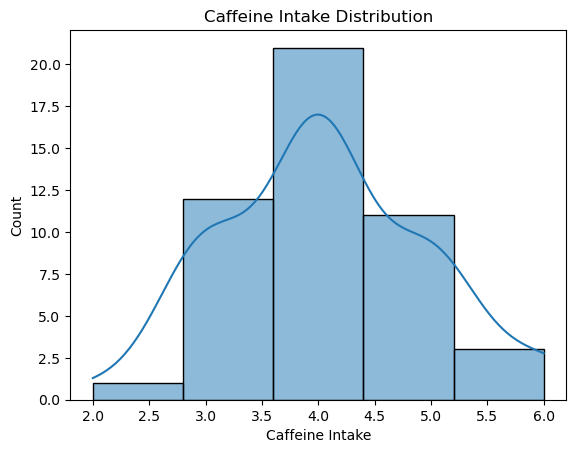

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Caffeine Intake'], bins=5, kde=True)
plt.title("Caffeine Intake Distribution")
plt.show()

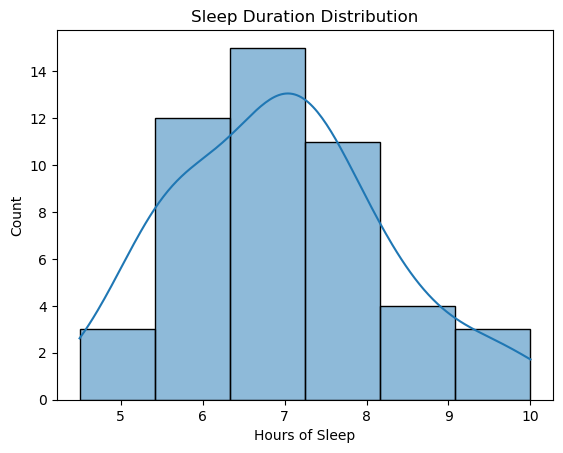

In [6]:
sns.histplot(data['Hours of Sleep'], bins=6, kde=True)
plt.title("Sleep Duration Distribution")
plt.show()

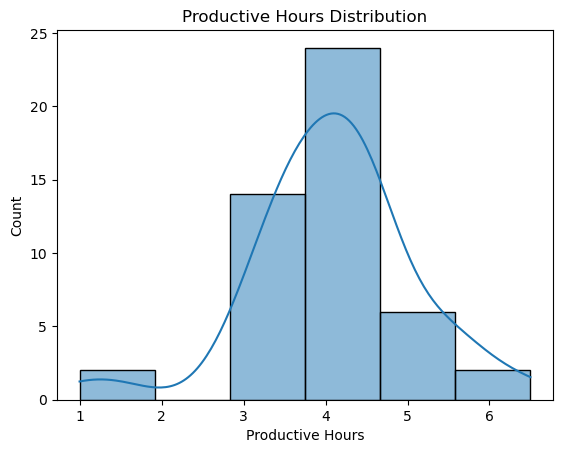

In [7]:
sns.histplot(data['Productive Hours'], bins=6, kde=True)
plt.title("Productive Hours Distribution")
plt.show()

# Date cannot be converted into a float, so we need to drop it in order to plot the correlation heatmap

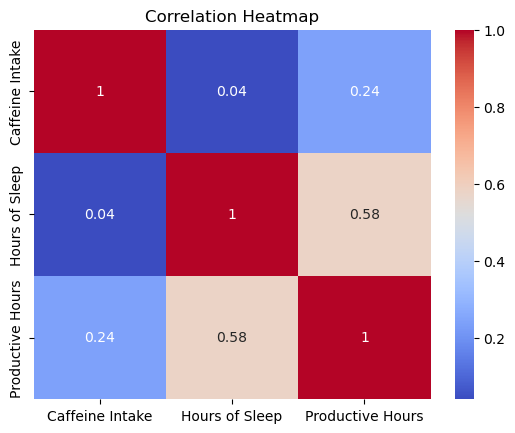

In [8]:
numeric_data = data.drop(columns=['Date'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Now I will do scatter plots for the relationships Caffeine Intake vs Productive Hours and Hours of Sleep vs Productive hours


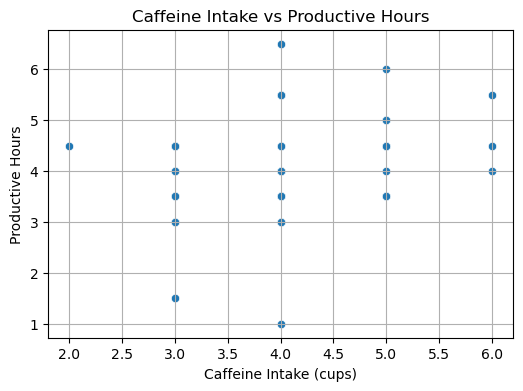

In [9]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_data, x='Caffeine Intake', y='Productive Hours')
plt.title("Caffeine Intake vs Productive Hours")
plt.xlabel("Caffeine Intake (cups)")
plt.ylabel("Productive Hours")
plt.grid(True)
plt.show()

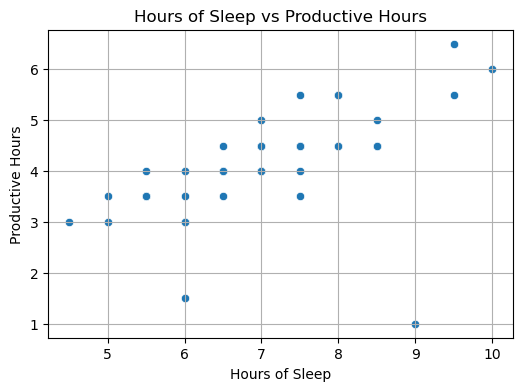

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_data, x='Hours of Sleep', y='Productive Hours')
plt.title("Hours of Sleep vs Productive Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Productive Hours")
plt.grid(True)
plt.show()

# As it can be seen from the scatterplots, there is a close to linear relationship between hours of sleep and productive hours 
## On the other hand, there is a weak correlation between caffeine intake and productive hours, so we can't categorize the scatterplot as linear or quadratic

<h3> Next, I will use the regplot method of Seaborn library to find the best fit line between hours of sleep and productive hours </h3>

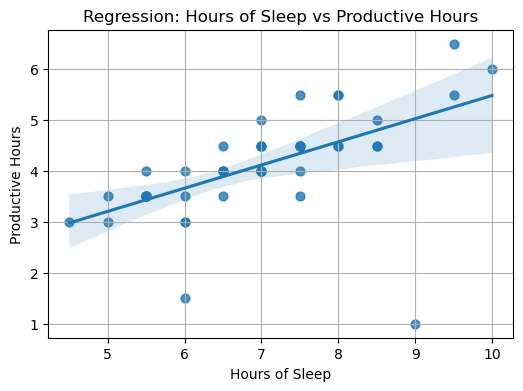

In [11]:
plt.figure(figsize=(6, 4))
sns.regplot(data=numeric_data, x='Hours of Sleep', y='Productive Hours', ci=95, scatter_kws={"s": 40})
plt.title("Regression: Hours of Sleep vs Productive Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Productive Hours")
plt.grid(True)
plt.show()

# The shaded region represents a 95% confidence interval that belongs to the best fit line. #
<h2> As it can be seen from the regplot, a significant portion of the datapoints belong to that confidence interval </h2>
<h3> But, I will examine the quadratic and polynomial types of regressions to see if I can achieve better fits </h3>

In [12]:
import numpy as np
import statsmodels.api as sm
x = numeric_data['Hours of Sleep']
y = numeric_data['Productive Hours']


X_quad = np.column_stack((x**2, x))
X_quad = sm.add_constant(X_quad)
model = sm.OLS(y, X_quad).fit()

x_pred = np.linspace(x.min(), x.max(), 100)
X_pred = np.column_stack((x_pred**2, x_pred))
X_pred = sm.add_constant(X_pred)
y_pred = model.predict(X_pred)

pred_summary = model.get_prediction(X_pred).summary_frame()
ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']


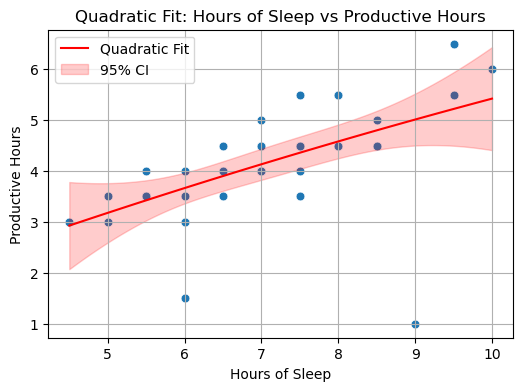

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, s=40)
plt.plot(x_pred, y_pred, color='red', label='Quadratic Fit')
plt.fill_between(x_pred, ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI')
plt.title("Quadratic Fit: Hours of Sleep vs Productive Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Productive Hours")
plt.legend()
plt.grid(True)
plt.show()

## Both linear and quadratic fits have relatively successful confidence intervals, but the quadratic model is better at explaining the variances and nouances in the data